In [4]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import numpy as np
import random
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten

In [18]:
# Load the Fashion-MNIST dataset
(X_train, Y_train), (X_test, Y_test) = tf.keras.datasets.fashion_mnist.load_data()

# Check the shape of the data
print(f"X_train shape: {X_train.shape}")  # (60000, 28, 28) - 60,000 grayscale images, 28x28 pixels
print(f"Y_train shape: {Y_train.shape}")  # (60000,) - 60,000 labels
print(f"X_test shape: {X_test.shape}")    # (10000, 28, 28) - 10,000 test images
print(f"Y_test shape: {Y_test.shape}")    # (10000,) - 10,000 test labels

X_train shape: (60000, 28, 28)
Y_train shape: (60000,)
X_test shape: (10000, 28, 28)
Y_test shape: (10000,)


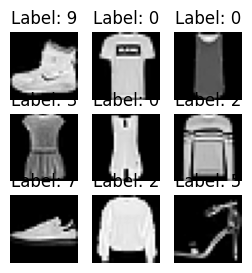

In [19]:
plt.figure(figsize=(3, 3))
for i in range(9):
    plt.subplot(3, 3, i + 1)
    plt.imshow(X_train[i], cmap='gray')
    plt.title(f"Label: {Y_train[i]}")
    plt.axis('off')
plt.show()


In [20]:
print("Shape of X_train: ", X_train.shape)
print("Shape of Y_train: ", Y_train.shape)
print("Shape of X_test: ", X_test.shape)
print("Shape of Y_test: ", Y_test.shape)

Shape of X_train:  (60000, 28, 28)
Shape of Y_train:  (60000,)
Shape of X_test:  (10000, 28, 28)
Shape of Y_test:  (10000,)


In [31]:
model = Sequential()

model.add(Conv2D(32, (3,3), activation = 'relu', input_shape = (28, 28, 1)))
model.add(MaxPooling2D((2,2)))

model.add(Conv2D(32, (3,3), activation = 'relu'))
model.add(MaxPooling2D((2,2)))

model.add(Flatten())
model.add(Dense(64, activation = 'relu'))
model.add(Dense(1, activation = 'sigmoid'))

In [32]:
model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

In [33]:
model.fit(X_train, Y_train, epochs = 5, batch_size = 64)

Epoch 1/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 44s 45ms/step - accuracy: 0.0993 - loss: -29149194240.0000
Epoch 2/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 78s 42ms/step - accuracy: 0.0995 - loss: -2009145933824.0000
Epoch 3/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 42s 43ms/step - accuracy: 0.0971 - loss: -14853280366592.0000
Epoch 4/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 38s 41ms/step - accuracy: 0.0990 - loss: -50793734471680.0000
Epoch 5/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 39s 42ms/step - accuracy: 0.1001 - loss: -119753645490176.0000


In [34]:
model.evaluate(X_test, Y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.0998 - loss: -197970158944256.0000


[-200198341001216.0, 0.10000000149011612]

In [36]:
predicted_classes = model.predict_classes(x_test)
#Get the indices to be plotted
y_true = test_df.iloc[:, 0]
correct = np.nonzero(predicted_classes==y_true)[0]
incorrect = np.nonzero(predicted_classes!=y_true)[0]
from sklearn.metrics import classification_report
target_names = ["Class {}".format(i) for i in range(num_classes)]
print(classification_report(y_true, predicted_classes, target_names=target_names))

AttributeError: 'Sequential' object has no attribute 'predict_classes'

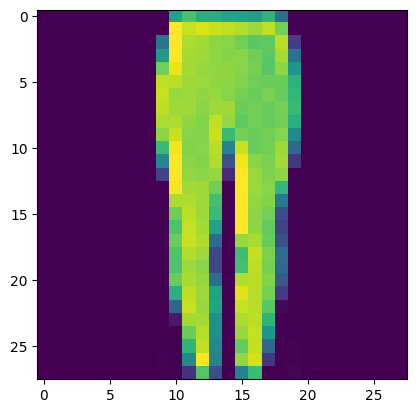

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step
Our model says it is a : cat


In [35]:
idx2 = random.randint(0, len(Y_test))
plt.imshow(X_test[idx2, :])
plt.show()

y_pred = model.predict(X_test[idx2, :].reshape(1, 28, 28, 1))
y_pred = y_pred > 0.5

if(y_pred == 0):
    pred = 'dog'
else:
    pred = 'cat'

print("Our model says it is a :", pred)

In [2]:
from subprocess import check_output
# print(check_output(["ls", "../input"]).decode("utf8"))
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import keras
from keras.models import Sequential
from keras.layers import Conv2D,MaxPooling2D,Dense,Flatten,Dropout
from keras.optimizers import Adam
from keras.callbacks import TensorBoard
num_classes = 10
epochs = 5

In [5]:
(x_train , y_train ), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()

# Check the shape of the data
print(f"X_train shape: {x_train.shape}")  # (60000, 28, 28) - 60,000 grayscale images, 28x28 pixels
print(f"Y_train shape: {y_train.shape}")  # (60000,) - 60,000 labels
print(f"X_test shape: {x_test.shape}")    # (10000, 28, 28) - 10,000 test images
print(f"Y_test shape: {y_test.shape}")    # (10000,) - 10,000 test labels

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 1us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
X_train shape: (60000, 28, 28)
Y_train shape: (60000,)
X_test shape: (10000, 28, 28)
Y_test shape: (10000,)


In [10]:
x_train,x_validate,y_train,y_validate = train_test_split(x_train,y_train,test_size = 0.2,random_state = 12345)

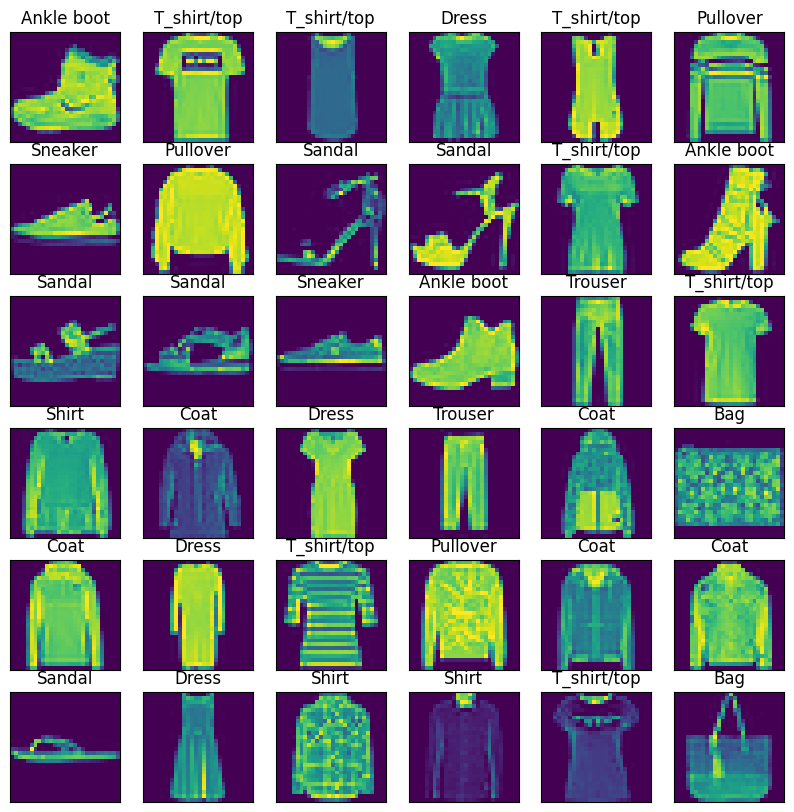

In [6]:
class_names = ['T_shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
plt.figure(figsize=(10, 10))
for i in range(36):
    plt.subplot(6, 6, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i].reshape((28,28)))
    label_index = int(y_train[i])
    plt.title(class_names[label_index])
plt.show()

In [11]:
# W_grid = 15
# L_grid = 15

# fig, axes = plt.subplots(L_grid, W_grid, figsize = (16,16))
# axes = axes.ravel() # flaten the 15 x 15 matrix into 225 array
# n_train = len(train_data) # get the length of the train dataset

# # Select a random number from 0 to n_train
# for i in np.arange(0, W_grid * L_grid): # create evenly spaces variables

#     # Select a random number
#     index = np.random.randint(0, n_train)
#     # read and display an image with the selected index
#     axes[i].imshow( train_data[index,1:].reshape((28,28)) )
#     labelindex = int(train_data[index,0])
#     axes[i].set_title(class_names[labelindex], fontsize = 9)
#     axes[i].axis('off')

# plt.subplots_adjust(hspace=0.3)

In [12]:
image_rows = 28
image_cols = 28
batch_size = 4096
image_shape = (image_rows,image_cols,1)

In [13]:
x_train = x_train.reshape(x_train.shape[0],*image_shape)
x_test = x_test.reshape(x_test.shape[0],*image_shape)
x_validate = x_validate.reshape(x_validate.shape[0],*image_shape)

In [14]:
cnn_model = Sequential([
    Conv2D(filters=32,kernel_size=3,activation='relu',input_shape = image_shape),
    MaxPooling2D(pool_size=2) ,# down sampling the output instead of 28*28 it is 14*14
    Dropout(0.2),
    Flatten(), # flatten out the layers
    Dense(32,activation='relu'),
    Dense(10,activation = 'softmax')

])

In [16]:
cnn_model.compile(loss ='sparse_categorical_crossentropy', optimizer=Adam(learning_rate=0.001),metrics =['accuracy'])

In [18]:
history = cnn_model.fit(
    x_train,
    y_train,
    batch_size=4096,
    epochs=10,
    verbose=1,
    validation_data=(x_validate,y_validate),
)

Epoch 1/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 29s 2s/step - accuracy: 0.2836 - loss: 14.2858 - val_accuracy: 0.2403 - val_loss: 2.2733
Epoch 2/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 40s 2s/step - accuracy: 0.2013 - loss: 2.2801 - val_accuracy: 0.1671 - val_loss: 2.1460
Epoch 3/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 29s 2s/step - accuracy: 0.1787 - loss: 2.1319 - val_accuracy: 0.2581 - val_loss: 1.9994
Epoch 4/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 39s 2s/step - accuracy: 0.2526 - loss: 2.0327 - val_accuracy: 0.2676 - val_loss: 1.9736
Epoch 5/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 41s 2s/step - accuracy: 0.2592 - loss: 2.0006 - val_accuracy: 0.2685 - val_loss: 1.9491
Epoch 6/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 41s 2s/step - accuracy: 0.2645 - loss: 1.9754 - val_accuracy: 0.2733 - val_loss: 1.9185
Epoch 7/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 41s 2s/step - accuracy: 0.2665 - loss: 1.9483 - val_accuracy: 0.2764 - val_loss: 1.8856
Epoch 8/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 28s 2s/step - accuracy: 0.2750 - loss: 1.9178 - val_accuracy: 0.3023 - val_loss

Text(0.5, 1.0, 'Train - Accuracy')

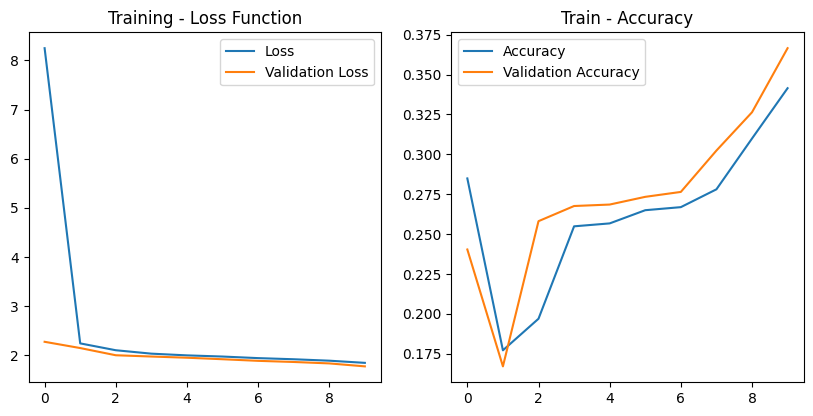

In [21]:
plt.figure(figsize=(10, 10))

plt.subplot(2, 2, 1)
plt.plot(history.history['loss'], label='Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('Training - Loss Function')

plt.subplot(2, 2, 2)
plt.plot(history.history['accuracy'], label='Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title('Train - Accuracy')

In [22]:
score = cnn_model.evaluate(x_test,y_test,verbose=0)
print('Test Loss : {:.4f}'.format(score[0]))
print('Test Accuracy : {:.4f}'.format(score[1]))

Test Loss : 1.7821
Test Accuracy : 0.3618


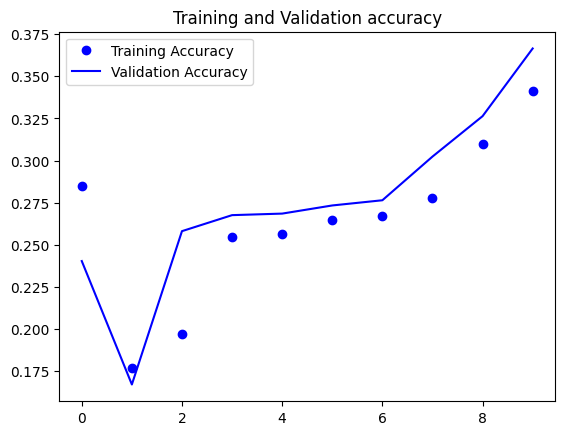

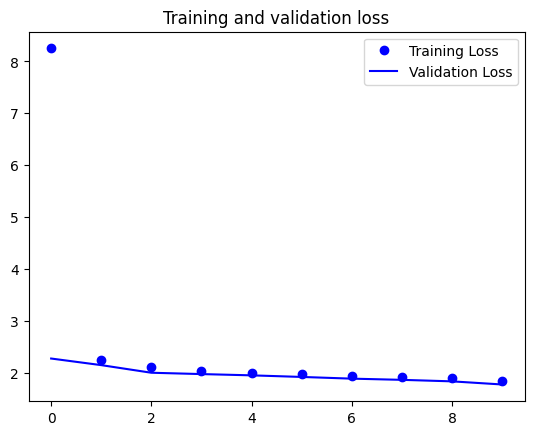

In [25]:
import matplotlib.pyplot as plt
%matplotlib inline
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(accuracy))
plt.plot(epochs, accuracy, 'bo', label='Training Accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation Accuracy')
plt.title('Training and Validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()